<a href="https://colab.research.google.com/github/kaveku/test-live-coding/blob/master/Angela_Munyao_PCA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
############################################################################################

The goal: is to apply the PCA on the data to reduce its dimension from 4 to 2.

Apply the PCA algorithm using numpy, here is a summary of the steps:

- Data preprocessing: mean normalization/feature scaling.

- find the covariance matrix (sigma).

- Compute the eigen vectors and eigen values of sigma.

- select k eigen vectors that with the highest variances.

- Transform the data x to the new reduced plane z; 

  z(n,k) = normalized_x(n,d).T * reduced_eigen_vec_matrix(d,k)

In [ ]:
df = pd.read_csv('/content/Data.csv')
df.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
def PCA(df, k):
  x = np.array(df)

  # step 1: calculate the Mean normalization of x
  dmean= np.mean(x, axis=0)
  x=x-dmean

  # step 2: calculate covariance matrix from the normalized_x
  cov= np.cov(x, rowvar = False)
  
  # make the parameter rowvar = False; check the documentation of np.cov to see why..

  # step 3: compute the eigen values and eigen vectors
  eigen_values , eigen_vectors = np.linalg.eigh(cov)

  # step 4: sort the eigen values in "descending" order, then use this sorted indicies to sort the eigen vectors.
  idexes = np.argsort(eigen_values)[::-1]
  eigen_values=eigen_values[idexes]
  eigen_vectors=eigen_vectors[:,idexes]

  # step 5: select k eigen vectors
  selected_eig_vectors= eigen_vectors[:, 0:k]

  # step 6: transform the data
  z = np.dot(selected_eig_vectors.transpose() , x.transpose()).transpose()


  return z

In [ ]:
k = 2 # reduce the data dimensionality to 2
z = PCA(df, k)
principal_df = pd.DataFrame(z, columns=['PC1', 'PC2'])
principal_df.head()

,PC1,PC2
0,2.684126,0.319397
1,2.714142,-0.177001
2,2.888991,-0.144949
3,2.745343,-0.318299
4,2.728717,0.326755


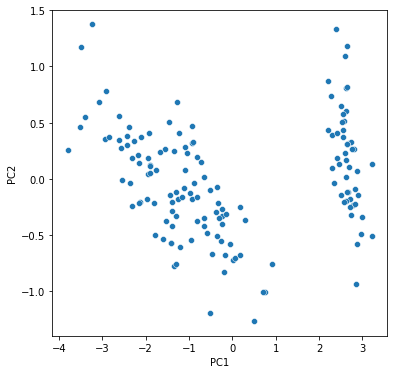

In [ ]:
# Visualize the result of PCA for 2 components
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2')

In [ ]:
###################################################################